# Perceptron

### Single Layered Perceptron (Less Used) (Gives Low Accuray)

#### Works poorly on Non-Linearly Seperable Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [5]:
df = pd.read_csv("students_placement.csv")
df.head()

,cgpa,iq,profile_score,placed
0,5.97,106,61,0
1,6.83,113,77,0
2,6.60,110,61,0
3,5.54,113,68,0
4,6.84,102,67,0


In [6]:
df.columns

Index(['cgpa', 'iq', 'profile_score', 'placed'], dtype='object')

In [8]:
df.head()

,cgpa,iq,profile_score,placed
0,5.97,106,61,0
1,6.83,113,77,0
2,6.60,110,61,0
3,5.54,113,68,0
4,6.84,102,67,0


In [9]:
df.isnull().sum()

,0
cgpa,0
iq,0
profile_score,0
placed,0


<Figure size 500x500 with 0 Axes>

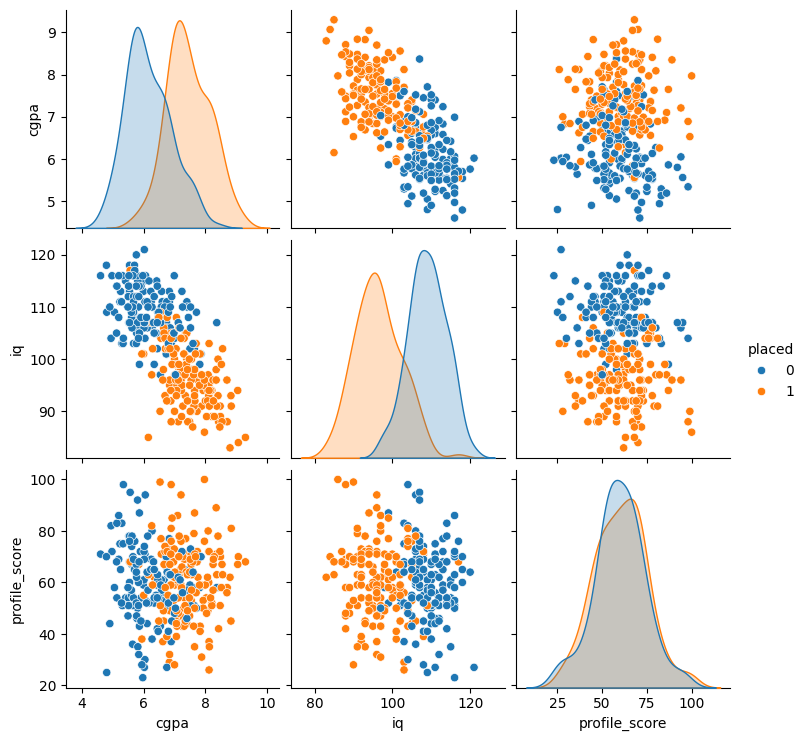

In [10]:
plt.figure(figsize = (5,5))
sns.pairplot(df,hue = "placed")
plt.show()

In [11]:
x = df.iloc[:,:-1]
y = df["placed"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
pn = Perceptron()
pn.fit(x_train,y_train)

Perceptron()

### Change the hyperparameters of Perceptron to get better accuracy

In [16]:
pn.score(x_train,y_train)*100 , pn.score(x_test,y_test)*100

(85.41666666666666, 78.33333333333333)

## MultiLayer Perceptron (ANN) (Most Used)

In [3]:
df1 = pd.read_csv("/content/Churn_Modelling.csv")
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df1.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df1["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df1 = df1.drop(columns=["RowNumber","Surname","CustomerId"])

In [8]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df1.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [10]:
num = []
obj = []

for i in df1.columns :
  if df1[i].dtype == "object" :
    obj.append(i)
  else :
    num.append(i)


In [11]:
num

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [12]:
obj

['Geography', 'Gender']

In [13]:
df1["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
for i in obj:
  df1[i] = le.fit_transform(df1[i])
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df1.dtypes

,0
CreditScore,int64
Geography,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [18]:
df1["Age"].max()

92

In [19]:
num

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [20]:
df1["Exited"].unique()

array([1, 0])

In [21]:
ss = StandardScaler()
df1[["CreditScore","Age","Balance","EstimatedSalary"]] = ss.fit_transform(df1[["CreditScore","Age","Balance","EstimatedSalary"]])

In [22]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276,0


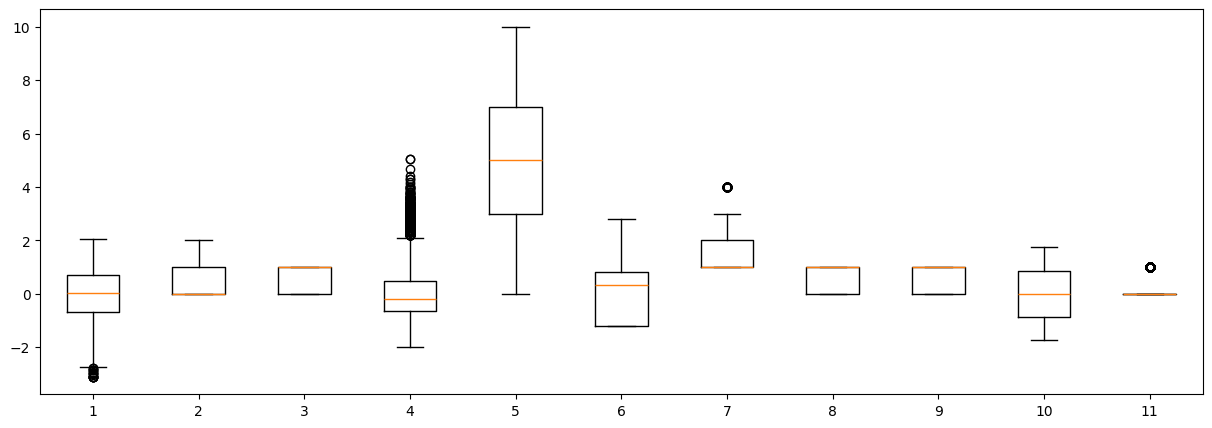

In [23]:
plt.figure(figsize = (15,5))
plt.boxplot(df1)
plt.show()

# 4 Doesnt contain outliers they are valid (Age of People)

In [24]:
input = df1.iloc[:,:-1]
output = df1["Exited"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2,random_state=42)

In [27]:
import tensorflow

In [28]:
from keras.layers import Dense
from keras.models import Sequential

In [29]:
ann = Sequential()

In [30]:
input.shape

(10000, 10)

In [31]:
x_train.shape

(8000, 10)

In [32]:
ann.add(Dense(units = 8,input_dim = 10,activation = "relu"))
ann.add(Dense(units = 6,activation = "relu"))
ann.add(Dense(units = 3,activation = "relu"))
ann.add(Dense(units = 1,activation = "sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [34]:
ann.fit(x_train,y_train,batch_size=100,epochs=50)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7974 - loss: 0.5565
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7953 - loss: 0.5027
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.4830
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.4604
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.4555
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7899 - loss: 0.4525
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7994 - loss: 0.4370
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7949 - loss: 0.4376
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8011 - loss: 0.4304
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7937 - loss: 0.4397
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7897 - loss: 0.4444
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - lo

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
prd = ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [37]:
prd_data = []
for i in prd:
  if i[0] > 0.5 :
    prd_data.append(1)
  else:
    prd_data.append(0)

In [38]:
prd1 = ann.predict(x_train)
prd_data1 = []
for i in prd1:
  if i[0] > 0.5 :
    prd_data1.append(1)
  else:
    prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [39]:
accuracy_score(y_test,prd_data)*100  # Testing Accuacy

82.25

In [40]:
accuracy_score(y_train,prd_data1)*100  # Training Accuracy

81.22500000000001

### The Model is not Overfitted

In [41]:
x_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,-0.564197,1,1,-0.660018,3,0.324119,2,0,0,-1.013811
4684,-0.284834,0,1,0.388871,1,-1.225848,2,1,1,0.804921
1731,-0.512463,2,0,0.484225,4,-1.225848,2,1,0,-0.722147
4742,-1.495407,1,1,1.914528,8,0.683816,2,1,1,1.227481
4521,-0.936681,2,0,-1.136786,7,0.777477,1,1,1,0.253524
...,...,...,...,...,...,...,...,...,...,...
6412,-0.502117,1,0,1.342407,5,0.349118,1,0,1,-0.957298
8285,-0.429689,0,1,-1.327494,10,-1.225848,1,0,1,0.170498
7853,0.822271,0,0,0.770285,7,-1.225848,1,1,0,-1.160142
1095,0.429093,0,1,-0.946079,4,-1.225848,1,1,0,-0.405759


In [42]:
p = np.array([[-0.564197,1,1,-0.660018,3,0.324119,2,0,0,-1.013811]])
p1 = np.array([[-0.502117,1,0,1.342407,5,0.349118,1,0,1,-0.957298]])

In [43]:
prd2 = ann.predict(p)
prd_data2 = []
for i in prd2:
  if i[0] > 0.5 :
    prd_data2.append(1)
  else:
    prd_data2.append(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [44]:
prd_data2

[0]

In [45]:
y_test

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
6412,1
8285,0
7853,1
1095,1


### The Model is giving good Predictions

# Overfitting

In [47]:
from keras.callbacks import EarlyStopping
from keras.regularizers import l2, l1, l1_l2
from keras.layers import Dropout

## EarlyStopping and Regularization are the methods used to remove or reduce the problem of Overfitting in the model

## They are Hyperparameters of the Neural Networks (EarlyStopping is used while fitting the model and Regularizations are used while creating the Layers(example : Dense))

# Batch Normalization (Reduces Vanishing Gradient Problem) and DropOut Layers

In [48]:
from keras.layers import BatchNormalization

In [50]:
ann1 = Sequential()

In [51]:
ann1.add(Dense(8,input_dim = 10,kernel_regularizer=l2(0.01)))
ann1.add(BatchNormalization())
ann1.add(Dropout(0.3))
ann1.add(Dense(6,kernel_regularizer=l2(0.01)))
ann1.add(BatchNormalization())
ann1.add(Dropout(0.3))
ann1.add(Dense(3,kernel_regularizer=l2(0.01)))
ann1.add(BatchNormalization())
ann1.add(Dropout(0.3))
ann1.add(Dense(1,activation = "sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
ann1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [54]:
ann1.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=EarlyStopping(patience=5),batch_size=200,epochs=40)

Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8029 - loss: 0.4603 - val_accuracy: 0.8060 - val_loss: 0.4360
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8007 - loss: 0.4626 - val_accuracy: 0.8060 - val_loss: 0.4359
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7976 - loss: 0.4636 - val_accuracy: 0.8070 - val_loss: 0.4345
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8039 - loss: 0.4566 - val_accuracy: 0.8105 - val_loss: 0.4348
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7954 - loss: 0.4662 - val_accuracy: 0.8070 - val_loss: 0.4342
Epoch 6/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7996 - loss: 0.4614 - val_accuracy: 0.8065 - val_loss: 0.4319
Epoch 7/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8035 - loss: 0.4485 - val_accuracy: 0.8070 - val_loss: 0.4334
Epoch 8/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7993 - loss: 0.4643 - val_accuracy: 0.8040 - val_los

In [55]:
prdn = ann1.predict(x_test)
prd_ndata = []
for i in prdn:
  if i[0] > 0.5 :
    prd_ndata.append(1)
  else:
    prd_ndata.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [56]:
prdn1 = ann1.predict(x_train)
prd_ndata1 = []
for i in prdn1:
  if i[0] > 0.5 :
    prd_ndata1.append(1)
  else:
    prd_ndata1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [57]:
accuracy_score(y_test,prd_ndata)*100  # Testing Accuacy

80.80000000000001

In [58]:
accuracy_score(y_train,prd_ndata1)*100  # Training Accuacy

80.5